In [1]:
from PIL import Image
import glob,os

In [7]:
from api import CtrLoRA

ModuleNotFoundError: No module named 'api'

In [6]:
ctrlora = CtrLoRA(num_loras=1)
ctrlora.create_model(
    sd_file='/data07/shared/xxu/cvpr/may07/sd15/v1-5-pruned.ckpt',
    basecn_file='/data07/shared/xxu/cvpr/may07/ctrlora/ctrlora-basecn/ctrlora_sd15_basecn700k.ckpt',
    lora_files='/data07/shared/xxu/cvpr/may07/ctrlora/ctrlora-loras/novel-conditions/ctrlora_sd15_basecn700k_inst_rank128_17kimgs_10ksteps.ckpt',
)


NameError: name 'CtrLoRA' is not defined

In [4]:
import glob,os
import json
with open('/data06/shared/xxu/miccai2025/color_to_HR/tcga_text_to_image_larger/experiments/data_missing_5000.json','r') as f:
    data_5000 = json.load(f)

In [5]:
from PIL import Image
i = 5
img = Image.open(os.path.join('/data06/shared/xxu/miccai2025/color_to_HR/tcga_text_to_image_larger/experiments/original_images_test_5000_inst_map_pannuke',data_5000[i]['path']))

In [7]:
data_5000[i]

{'wsi_id': 'TCGA-BH-A1EW-01Z-00-DX1.A6A5F9C5-FB97-4DA3-A1EA-1F84BC006681',
 'position': "['9696', '10752']",
 'caption': 'The tissue sample exhibits pleomorphism, high nuclear-to-cytoplasmic ratios, prominent nucleoli, and disorganized architecture, indicative of a neoplastic process. Duct-like structures suggest a breast origin, possibly pointing to ductal carcinoma. Additional testing is needed for a definitive diagnosis.',
 'path': 'TCGA-BH-A1EW-01Z-00-DX1.A6A5F9C5-FB97-4DA3-A1EA-1F84BC006681_9696_10752.png'}

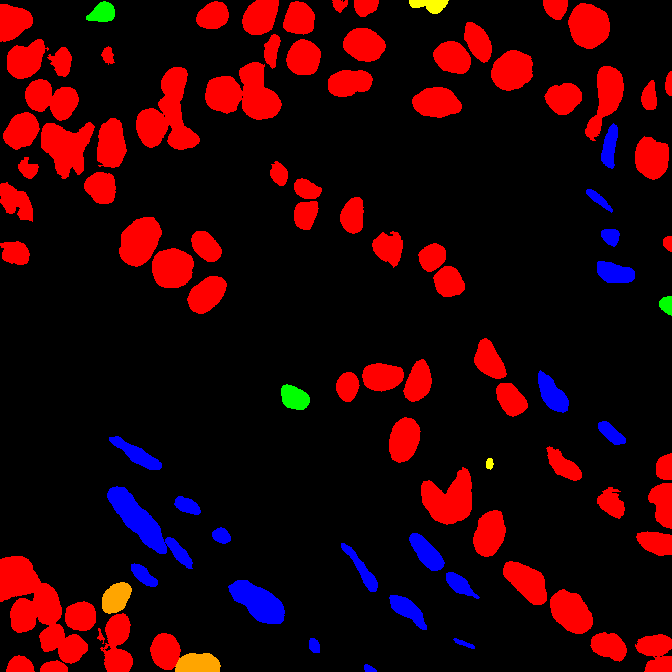

In [6]:
img

In [10]:
import glob,os
imgs = glob.glob('/data06/shared/xxu/miccai2025/color_to_HR/tcga_text_to_image_larger/experiments/original_images_test_5000_inst_map_pannuke/*.png')
imgs.sort()
print(len(imgs))

5000


In [13]:
from tqdm import tqdm
for i in tqdm(range(len(imgs))):
    cond_img = Image.open(imgs[i]).convert('RGB')
    cond_img = cond_img.resize((512,512))
    cond_img.save(imgs[i].replace("original_images_test_5000_inst_map_pannuke","original_images_test_5000_inst_map_pannuke_512"))
    

100%|██████████| 5000/5000 [14:47<00:00,  5.63it/s]


In [14]:

samples = ctrlora.sample(
    cond_image_paths=os.path.join('/data06/shared/xxu/miccai2025/color_to_HR/tcga_text_to_image_larger/experiments/original_images_test_5000_inst_map_pannuke_512',data_5000[i]['path']),
    prompt=data_5000[i]['caption'],
    n_prompt='worst quality',
    num_samples=1,
)
samples[0]

Data shape for DDIM sampling is (1, 4, 64, 64), eta 0
Running DDIM Sampling with 20 timesteps


DDIM Sampler: 100%|██████████| 20/20 [00:28<00:00,  1.40s/it]


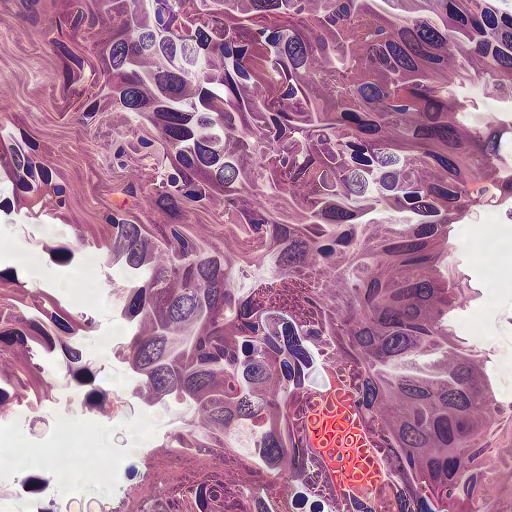

In [28]:
samples[0]

In [29]:
for i in range(20):
    samples = ctrlora.sample(
        cond_image_paths=os.path.join('/data06/shared/xxu/miccai2025/color_to_HR/tcga_text_to_image_larger/experiments/original_images_test_5000_inst_map_pannuke_512',data_5000[i]['path']),
        prompt=data_5000[i]['caption'],
        n_prompt='worst quality',
        num_samples=1,
    )
    save_path = os.path.join('/data07/shared/xxu/cvpr/may07/experiments/generated_images_epoch_1',data_5000[i]['path'])
    samples[0].save(save_path)

Data shape for DDIM sampling is (1, 4, 64, 64), eta 0
Running DDIM Sampling with 20 timesteps


DDIM Sampler: 100%|██████████| 20/20 [00:28<00:00,  1.43s/it]


Data shape for DDIM sampling is (1, 4, 64, 64), eta 0
Running DDIM Sampling with 20 timesteps


DDIM Sampler: 100%|██████████| 20/20 [00:28<00:00,  1.43s/it]


Data shape for DDIM sampling is (1, 4, 64, 64), eta 0
Running DDIM Sampling with 20 timesteps


DDIM Sampler: 100%|██████████| 20/20 [00:28<00:00,  1.42s/it]


Data shape for DDIM sampling is (1, 4, 64, 64), eta 0
Running DDIM Sampling with 20 timesteps


DDIM Sampler: 100%|██████████| 20/20 [00:28<00:00,  1.43s/it]


Data shape for DDIM sampling is (1, 4, 64, 64), eta 0
Running DDIM Sampling with 20 timesteps


DDIM Sampler: 100%|██████████| 20/20 [00:28<00:00,  1.43s/it]


Data shape for DDIM sampling is (1, 4, 64, 64), eta 0
Running DDIM Sampling with 20 timesteps


DDIM Sampler: 100%|██████████| 20/20 [00:28<00:00,  1.43s/it]


Data shape for DDIM sampling is (1, 4, 64, 64), eta 0
Running DDIM Sampling with 20 timesteps


DDIM Sampler: 100%|██████████| 20/20 [00:28<00:00,  1.43s/it]


Data shape for DDIM sampling is (1, 4, 64, 64), eta 0
Running DDIM Sampling with 20 timesteps


DDIM Sampler: 100%|██████████| 20/20 [00:28<00:00,  1.42s/it]


Data shape for DDIM sampling is (1, 4, 64, 64), eta 0
Running DDIM Sampling with 20 timesteps


DDIM Sampler: 100%|██████████| 20/20 [00:28<00:00,  1.43s/it]


Data shape for DDIM sampling is (1, 4, 64, 64), eta 0
Running DDIM Sampling with 20 timesteps


DDIM Sampler: 100%|██████████| 20/20 [00:28<00:00,  1.43s/it]


Data shape for DDIM sampling is (1, 4, 64, 64), eta 0
Running DDIM Sampling with 20 timesteps


DDIM Sampler: 100%|██████████| 20/20 [00:28<00:00,  1.43s/it]


Data shape for DDIM sampling is (1, 4, 64, 64), eta 0
Running DDIM Sampling with 20 timesteps


DDIM Sampler: 100%|██████████| 20/20 [00:28<00:00,  1.42s/it]


Data shape for DDIM sampling is (1, 4, 64, 64), eta 0
Running DDIM Sampling with 20 timesteps


DDIM Sampler: 100%|██████████| 20/20 [00:28<00:00,  1.43s/it]


Data shape for DDIM sampling is (1, 4, 64, 64), eta 0
Running DDIM Sampling with 20 timesteps


DDIM Sampler: 100%|██████████| 20/20 [00:28<00:00,  1.43s/it]


Data shape for DDIM sampling is (1, 4, 64, 64), eta 0
Running DDIM Sampling with 20 timesteps


DDIM Sampler: 100%|██████████| 20/20 [00:28<00:00,  1.43s/it]


Data shape for DDIM sampling is (1, 4, 64, 64), eta 0
Running DDIM Sampling with 20 timesteps


DDIM Sampler: 100%|██████████| 20/20 [00:28<00:00,  1.41s/it]


Data shape for DDIM sampling is (1, 4, 64, 64), eta 0
Running DDIM Sampling with 20 timesteps


DDIM Sampler: 100%|██████████| 20/20 [00:28<00:00,  1.43s/it]


Data shape for DDIM sampling is (1, 4, 64, 64), eta 0
Running DDIM Sampling with 20 timesteps


DDIM Sampler: 100%|██████████| 20/20 [00:28<00:00,  1.43s/it]


Data shape for DDIM sampling is (1, 4, 64, 64), eta 0
Running DDIM Sampling with 20 timesteps


DDIM Sampler: 100%|██████████| 20/20 [00:28<00:00,  1.43s/it]


Data shape for DDIM sampling is (1, 4, 64, 64), eta 0
Running DDIM Sampling with 20 timesteps


DDIM Sampler: 100%|██████████| 20/20 [00:28<00:00,  1.43s/it]


In [19]:
data_5000_path = [item['path'] for item in data_5000]

In [1]:
import json

# 路径设置
jsonl_path = "/data07/shared/xxu/cvpr/may07/dataset_custom/prompt.jsonl"  # 替换为你的 jsonl 文件路径
data = []

# 读取 JSONL 文件
with open(jsonl_path, "r") as f:
    for line in f:
        item = json.loads(line.strip())  # 每行解析为字典
        data.append(item)

# 示例：打印前3条
for item in data[:3]:
    print(item)


{'source': 'source/TCGA-B6-A0WS-01Z-00-DX1.020ED7BF-9497-4F13-AA07-FE0E839F9A06_99936_25280.png', 'target': 'target/TCGA-B6-A0WS-01Z-00-DX1.020ED7BF-9497-4F13-AA07-FE0E839F9A06_99936_25280.png', 'prompt': 'The breast tissue image shows fibrocystic changes characterized by a dense, pink collagenous stroma and a cribriform pattern. There is epithelial hyperplasia without visible cysts. These findings suggest fibrocystic disease, indicated by fibrosis and architectural distortion, but no signs of malignancy are present. The diagnosis aligns with typical fibrocystic breast pathology.'}
{'source': 'source/TCGA-EB-A3XC-01Z-00-DX1.F50679D7-D525-4F20-980F-AF43D7E9EBE6_35968_14208.png', 'target': 'target/TCGA-EB-A3XC-01Z-00-DX1.F50679D7-D525-4F20-980F-AF43D7E9EBE6_35968_14208.png', 'prompt': 'The skin tissue image reveals atypical, pleomorphic cells with high nuclear-to-cytoplasmic ratios and hyperchromatic nuclei, indicative of malignancy. Disrupted tissue architecture and absence of normal st

In [2]:
print(len(data))

171228


In [23]:
data_path = [item['source'].split('/')[-1] for item in data]

In [26]:
len(set(data_path).union(set(data_5000_path)))

176228

In [27]:
len(data)+len(data_5000)

176228

In [3]:
import glob,os
images_2k = glob.glob('/data07/shared/xxu/cvpr/may07/pathgen/pathgen_2k_hovernet_pannuke/*.png')
images_2k.sort()
images_4k = glob.glob('/data07/shared/xxu/cvpr/may07/pathgen/pathgen_4k_hovernet_pannuke/*.png')
images_4k.sort()
print('images 2k:{} 4k:{}'.format(len(images_2k),len(images_4k)))

images 2k:19972 4k:19905


In [4]:
from tqdm import tqdm
for item in tqdm(images_2k):
    img = Image.open(item).convert('RGB')
    img = img.resize((512,512))
    img.save(item.replace('pathgen_2k_hovernet_pannuke','pathgen_2k_hovernet_pannuke_512'))

100%|██████████| 19972/19972 [35:07<00:00,  9.48it/s]


Selected image: TCGA-UW-A72P-01Z-00-DX1.B16A8F4B-6E8E-4642-AEEF-EBD0613C372D_136864_37920.png


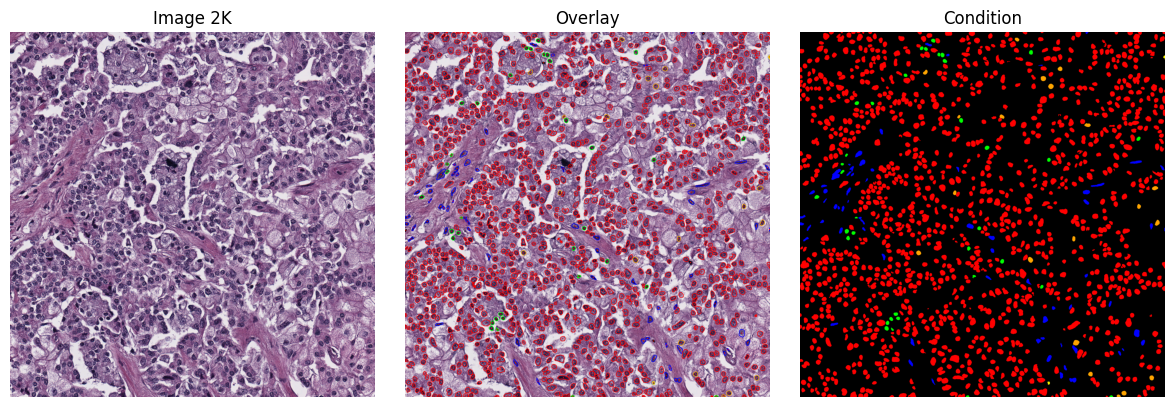

In [2]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# 路径设定
image_root = "/data06/shared/xxu/miccai2025/color_to_HR/tcga_text_to_image_larger/other_data/pathgen_4k/images_2k/"
overlay_root = "/data06/shared/xxu/miccai2025/color_to_HR/tcga_text_to_image_larger/other_data/pathgen_4k_segmentation/pathgen_2k_images_hovernet_pannuke/overlay"
cond_root = "/data07/shared/xxu/cvpr/may07/pathgen/pathgen_2k_hovernet_pannuke"

# 读取所有 PNG 文件名
png_files = [f for f in os.listdir(image_root) if f.endswith('.png')]
if not png_files:
    raise FileNotFoundError("No PNG files found in the specified directory.")

# 随机选择一个
random_name = random.choice(png_files)
print("Selected image:", random_name)

# 构造完整路径
image_path = os.path.join(image_root, random_name)
overlay_path = os.path.join(overlay_root, random_name)
cond_path = os.path.join(cond_root, random_name)

# 加载图像
img = Image.open(image_path)
overlay = Image.open(overlay_path)
cond = Image.open(cond_path)

# 可视化
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title("Image 2K")
plt.imshow(img)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Overlay")
plt.imshow(overlay)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Condition")
plt.imshow(cond)
plt.axis('off')

plt.tight_layout()
plt.show()


In [1]:
import os
import random
import re
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 设置目录
image_dir = "/data07/shared/xxu/cvpr/may07/data_2k/patches_from_jsonl/images_512"

# 获取所有 patch 文件
all_files = [f for f in os.listdir(image_dir) if f.endswith(".png")]

# 从中随机选一个 base name（如 TCGA-XX_r0_c0 → TCGA-XX）
random_file = random.choice(all_files)
base_name = "_".join(random_file.split("_")[:-2])  # 去掉 _rX_cY

# 找出所有属于该图的大 patch（即同一张 2K 图的所有 patch）
pattern = re.compile(rf"{re.escape(base_name)}_r(\d+)_c(\d+)\.png")
matched = []
for f in all_files:
    match = pattern.match(f)
    if match:
        row, col = int(match.group(1)), int(match.group(2))
        matched.append((row, col, f))

# 排序并获取行列数
rows = max([r for r, c, _ in matched]) + 1
cols = max([c for r, c, _ in matched]) + 1

# 构建 patch 网格
grid = [[None for _ in range(cols)] for _ in range(rows)]
for r, c, fname in matched:
    path = os.path.join(image_dir, fname)
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    grid[r][c] = img

# 显示 patch 网格
fig, axs = plt.subplots(rows, cols, figsize=(cols * 2, rows * 2))
for i in range(rows):
    for j in range(cols):
        axs[i, j].imshow(grid[i][j])
        axs[i, j].axis("off")
        axs[i, j].set_title(f"r{i}_c{j}", fontsize=8)
plt.tight_layout()
plt.show()


Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x155551736f80>>
Traceback (most recent call last):
  File "/home/xxu/anaconda3/envs/ctrlora/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 
